# Статистика всех игроков в шахматы с титулом GM за 2023 год

Датасет содержит подробную статистику всех игроков с титулом GM (Гроссмейстер) на chess.com со следующими столбцами.

## Поля датасета:
- name: Имя шахматиста
- username: Имя пользователя шахматиста на chess.com
- profile: Ссылка на профиль шахматиста на chess.com
- user_id: Идентификатор пользователя на chess.com
- title: GM (Гроссмейстер)
- fide: Рейтинг FIDE шахматиста
- В мире шахмат высшим руководящим органом является Международная шахматная федерация (FIDE), которая ведет и обновляет рейтинги профессиональных шахматистов на основе их выступлений в зарегистрированных турнирах.
- country: Страна шахматиста
- followers: Количество подписчиков шахматиста на chess.com
- joined: Дата регистрации шахматиста на chess.com
- last_online: Последний визит шахматиста на chess.com
- current_rapid_rating: Текущий рейтинг в рапиде
- (Рапид имеет те же правила, что и классические шахматы, но у игроков есть от 10 до 60 минут на партию.)
- highest_rapid_rating: Высший рейтинг в рапиде, который шахматист когда-либо достигал на chess.com
- highest_rapid_date: Дата, когда шахматист достиг своего высшего рейтинга в рапиде на chess.com
- rapid_win: Общее количество побед в рапиде
- rapid_draw: Общее количество ничьих в рапиде
- rapid_loss: Общее количество поражений в рапиде
- current_blitz_rating: Текущий рейтинг в блице (Для партий длительностью более 3 минут, но менее 10 минут)
- highest_blitz_rating: Высший рейтинг в блице, который шахматист когда-либо достигал на chess.com
- highest_blitz_date: Дата, когда шахматист достиг своего высшего рейтинга в блице на chess.com
- blitz_win: Общее количество побед в блице
- blitz_draw: Общее количество ничьих в блице
- blitz_loss: Общее количество поражений в блице
- current_bullet_rating: Текущий рейтинг в буллите (Для партий длительностью менее 60 секунд)
- highest_bullet_rating: Высший рейтинг в буллите, который шахматист когда-либо достигал на chess.com
- highest_bullet_date: Дата, когда шахматист достиг своего высшего рейтинга в буллите на chess.com
- bullet_win: Общее количество побед в буллите
- bullet_draw: Общее количество ничьих в буллите
- bullet_loss: Общее количество поражений в буллите
- highest_tactics_rating: Высший рейтинг, которого шахматист достиг в режиме "тактики" на chess.com
- highest_tactics_date: Дата, когда шахматист достиг своего высшего рейтинга в тактиках
- highest_puzzle_rating: Высший рейтинг, которого шахматист достиг в режиме "пазлы" на chess.com
- is_streamer: Является ли шахматист стримером
- status: Является ли шахматист премиум-пользователем или обычным пользователем
- league: Лига, в которой шахматист находится в настоящее время на chess.com (основывается на частоте игры на chess.com)

In [1]:
# Импорт зависимостей
import numpy as np
import pandas as pd
from sklearn.datasets import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Основные характеристики датасета

In [2]:
df = pd.read_csv('GM_players_statistics.csv')

In [3]:
df.head()

ID                name        username  \
0   0       Komodo Engine     komodochess   
1   1        Vojtěch Plát     vojtechplat   
2   2  PlayMagnus Carlsen      playmagnus   
3   3      Magnus Carlsen   magnuscarlsen   
4   4     Fabiano Caruana  fabianocaruana   

                                       profile   user_id title    fide  \
0     https://www.chess.com/member/KomodoChess  24944922    GM  3411.0   
1     https://www.chess.com/member/VojtechPlat  37712368    GM  2950.0   
2      https://www.chess.com/member/PlayMagnus  19578862    GM  2882.0   
3   https://www.chess.com/member/MagnusCarlsen   3889224    GM  2882.0   
4  https://www.chess.com/member/FabianoCaruana  11177810    GM  2835.0   

          country  followers      joined  ... highest_bullet_date  bullet_win  \
0   United States        494  07/11/2015  ...                 NaN         NaN   
1  Czech Republic        360  11/08/2017  ...          27/09/2021        32.0   
2          Norway        199  05/11/2014  ...                 NaN         NaN   
3          Norway     142482  27/08/2010  ...          28/03/2023       662.0   
4   United States      14445  17/03/2013  ...          30/11/2021       713.0   

   bullet_draw bullet_loss  highest_tactics_rating  highest_tactics_date  \
0          NaN         NaN                     400            07/11/2015   
1          8.0        47.0                    3251            15/09/2021   
2          NaN         NaN                     400            05/11/2014   
3         98.0       246.0                     400            27/08/2010   
4         65.0       203.0                    3519            14/06/2023   

   highest_puzzle_rush_score  is_streamer   status   league  
0                        NaN        False  premium      NaN  
1                       49.0        False  premium   Bronze  
2                        NaN        False  premium      NaN  
3                        NaN        False  premium    Elite  
4                       64.0        False  premium  Crystal  

[5 rows x 35 columns]

In [4]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1508


In [5]:
df.dtypes

ID                             int64
name                          object
username                      object
profile                       object
user_id                        int64
title                         object
fide                         float64
country                       object
followers                      int64
joined                        object
last_online                   object
current_rapid_rating         float64
highest_rapid_rating         float64
highest_rapid_date            object
rapid_win                    float64
rapid_draw                   float64
rapid_loss                   float64
current_blitz_rating         float64
highest_blitz_rating         float64
highest_blitz_date            object
blitz_win                    float64
blitz_draw                   float64
blitz_loss                   float64
current_bullet_rating        float64
highest_bullet_rating        float64
highest_bullet_date           object
bullet_win                   float64
b

In [6]:
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

ID - 0
name - 267
username - 0
profile - 0
user_id - 0
title - 0
fide - 595
country - 0
followers - 0
joined - 0
last_online - 0
current_rapid_rating - 453
highest_rapid_rating - 511
highest_rapid_date - 511
rapid_win - 453
rapid_draw - 453
rapid_loss - 453
current_blitz_rating - 120
highest_blitz_rating - 126
highest_blitz_date - 126
blitz_win - 120
blitz_draw - 120
blitz_loss - 120
current_bullet_rating - 335
highest_bullet_rating - 364
highest_bullet_date - 364
bullet_win - 335
bullet_draw - 335
bullet_loss - 335
highest_tactics_rating - 0
highest_tactics_date - 0
highest_puzzle_rush_score - 387
is_streamer - 0
status - 0
league - 380


In [7]:
df.describe()

ID       user_id         fide     followers  \
count  1508.000000  1.508000e+03   913.000000  1.508000e+03   
mean    753.500000  4.145837e+07  2002.937568  1.471572e+03   
std     435.466417  4.256272e+07  1061.740709  3.028318e+04   
min       0.000000  3.453000e+03     0.000000  0.000000e+00   
25%     376.750000  1.566528e+07  2405.000000  2.100000e+01   
50%     753.500000  2.930790e+07  2523.000000  9.300000e+01   
75%    1130.250000  5.558539e+07  2600.000000  3.375000e+02   
max    1507.000000  2.994302e+08  3411.000000  1.163963e+06   

       current_rapid_rating  highest_rapid_rating    rapid_win   rapid_draw  \
count           1055.000000            997.000000  1055.000000  1055.000000   
mean            2382.517536           2555.735206    35.672986    12.870142   
std              316.522940            253.590732    89.034619    41.688089   
min              263.000000           1200.000000     0.000000     0.000000   
25%             2306.000000           2470.000000     4.000000     1.000000   
50%             2455.000000           2590.000000    12.000000     4.000000   
75%             2567.500000           2715.000000    31.000000    12.000000   
max             2948.000000           3045.000000  1561.000000  1150.000000   

        rapid_loss  current_blitz_rating  ...     blitz_win   blitz_draw  \
count  1055.000000           1388.000000  ...   1388.000000  1388.000000   
mean     15.783886           2696.157781  ...   1460.873199   272.278098   
std      43.302878            242.827932  ...   2760.901696   463.509412   
min       0.000000            255.000000  ...      0.000000     0.000000   
25%       2.000000           2565.000000  ...    151.000000    23.000000   
50%       6.000000           2725.000000  ...    564.500000   100.500000   
75%      16.000000           2860.250000  ...   1710.500000   334.250000   
max     878.000000           3287.000000  ...  39863.000000  5277.000000   

         blitz_loss  current_bullet_rating  highest_bullet_rating  \
count   1388.000000            1173.000000            1144.000000   
mean    1046.095821            2654.360614            2722.385490   
std     2049.376713             299.828128             329.610058   
min        0.000000            1079.000000             929.000000   
25%       79.000000            2521.000000            2570.750000   
50%      344.000000            2692.000000            2765.000000   
75%     1223.250000            2842.000000            2921.250000   
max    31979.000000            3371.000000            3570.000000   

         bullet_win  bullet_draw   bullet_loss  highest_tactics_rating  \
count   1173.000000  1173.000000   1173.000000             1508.000000   
mean     946.055413    96.741688    649.266837             2494.932361   
std     3070.557355   284.516473   2152.914731             1138.007051   
min        0.000000     0.000000      0.000000              400.000000   
25%       28.000000     2.000000     14.000000             1243.750000   
50%      168.000000    16.000000     94.000000             2851.000000   
75%      692.000000    77.000000    484.000000             3359.000000   
max    58921.000000  4888.000000  37681.000000             6779.000000   

       highest_puzzle_rush_score  
count                1121.000000  
mean                   53.611062  
std                    18.662951  
min                     0.000000  
25%                    43.000000  
50%                    52.000000  
75%                    63.000000  
max                   253.000000  

[8 rows x 21 columns]

# 3. Визуальные исследования

<Axes: xlabel='highest_rapid_rating', ylabel='highest_blitz_rating'>

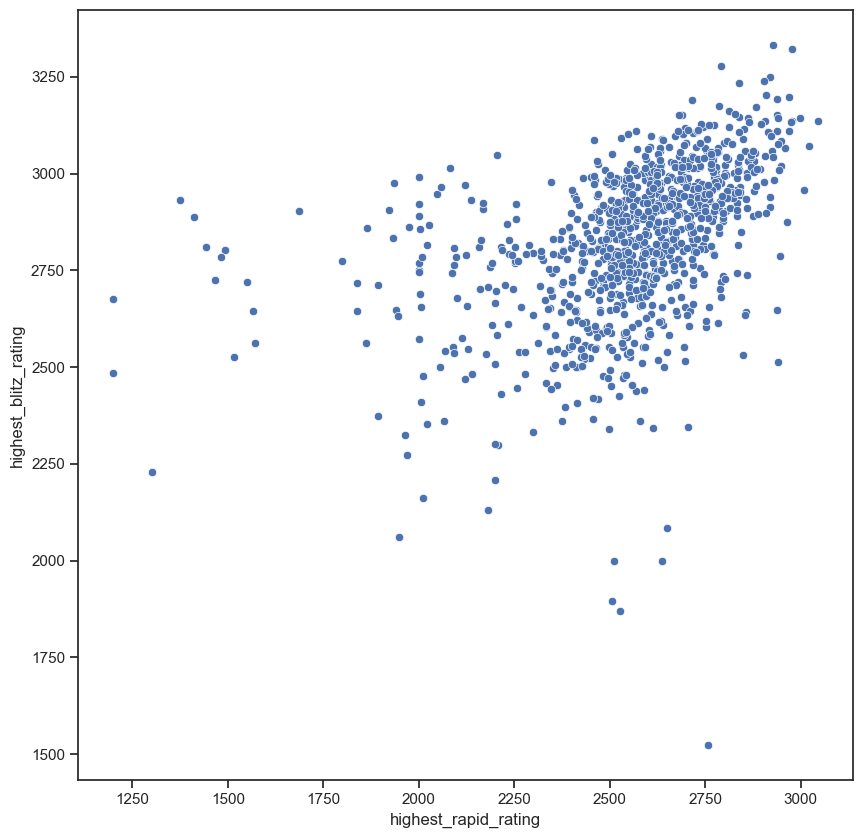

In [8]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x=df['highest_rapid_rating'], y=df['highest_blitz_rating'], data=df)

<Axes: xlabel='highest_rapid_rating', ylabel='highest_blitz_rating'>

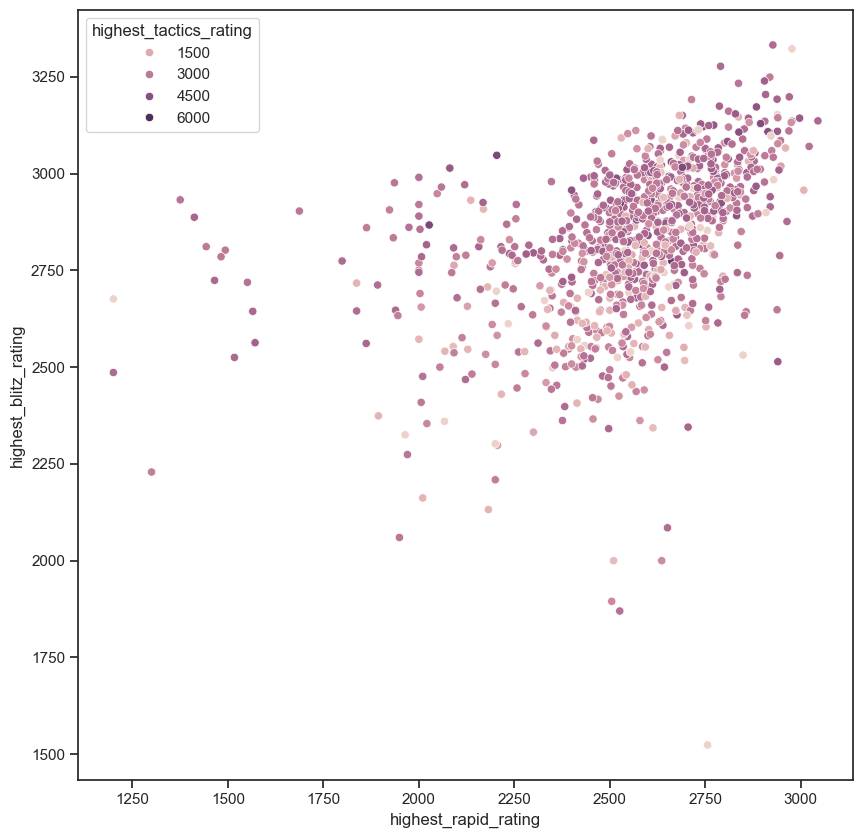

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(ax=ax, x=df['highest_rapid_rating'], y=df['highest_blitz_rating'], data=df, hue='highest_tactics_rating')

C:\Users\Konstantin\AppData\Local\Temp\ipykernel_9876\542991445.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['current_blitz_rating'])


<Axes: xlabel='current_blitz_rating', ylabel='Density'>

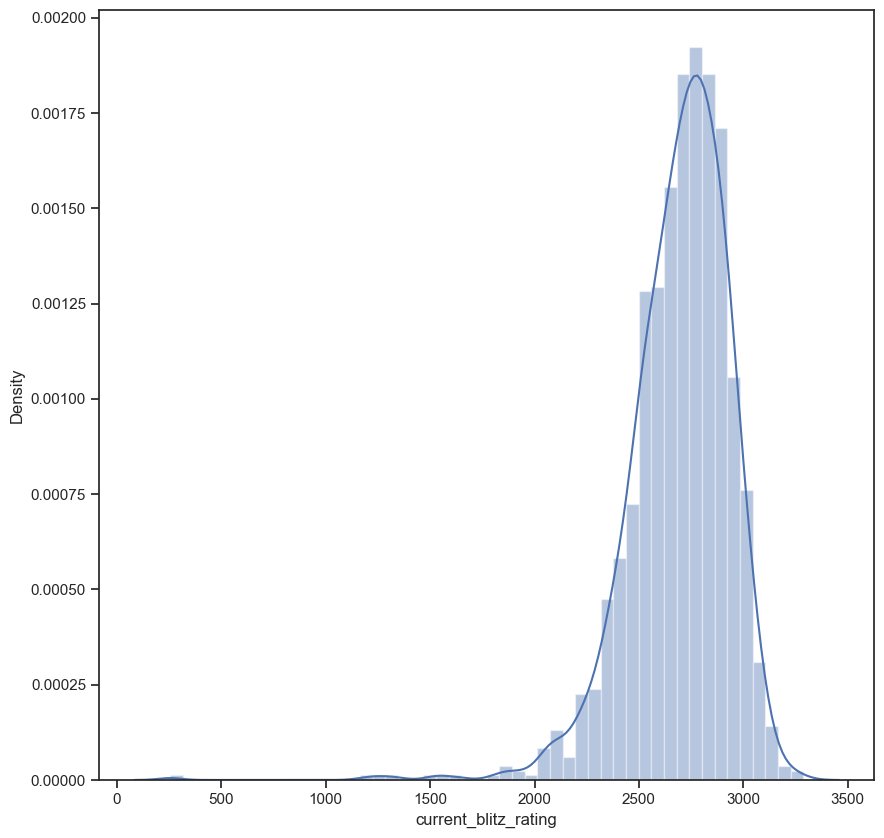

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df['current_blitz_rating'])

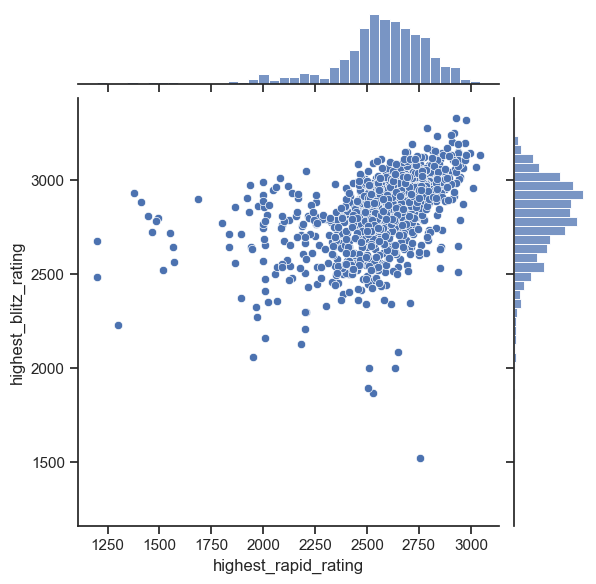

In [11]:
sns.jointplot(x=df['highest_rapid_rating'], y=df['highest_blitz_rating'], data=df)

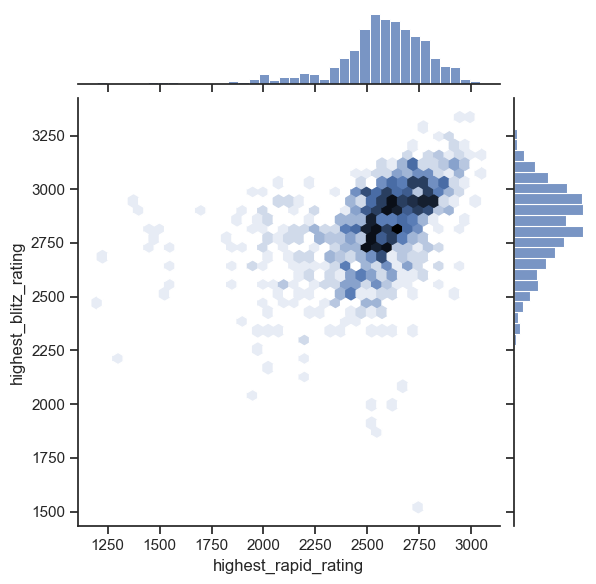

In [12]:
sns.jointplot(x=df['highest_rapid_rating'], y=df['highest_blitz_rating'], data=df, kind='hex')

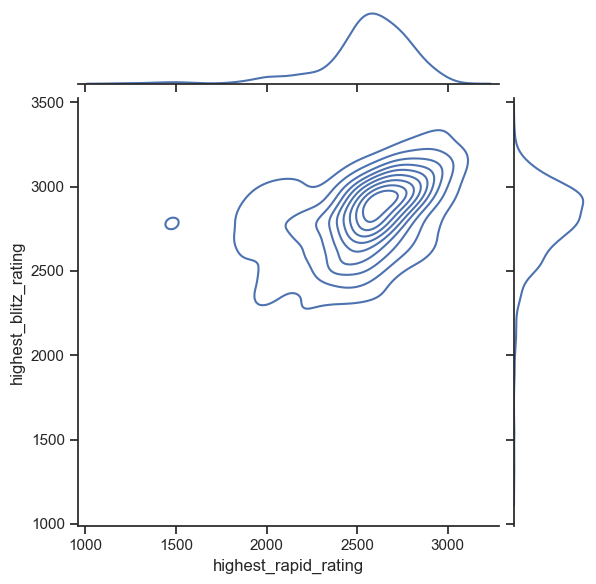

In [13]:
sns.jointplot(x=df['highest_rapid_rating'], y=df['highest_blitz_rating'], data=df, kind='kde')

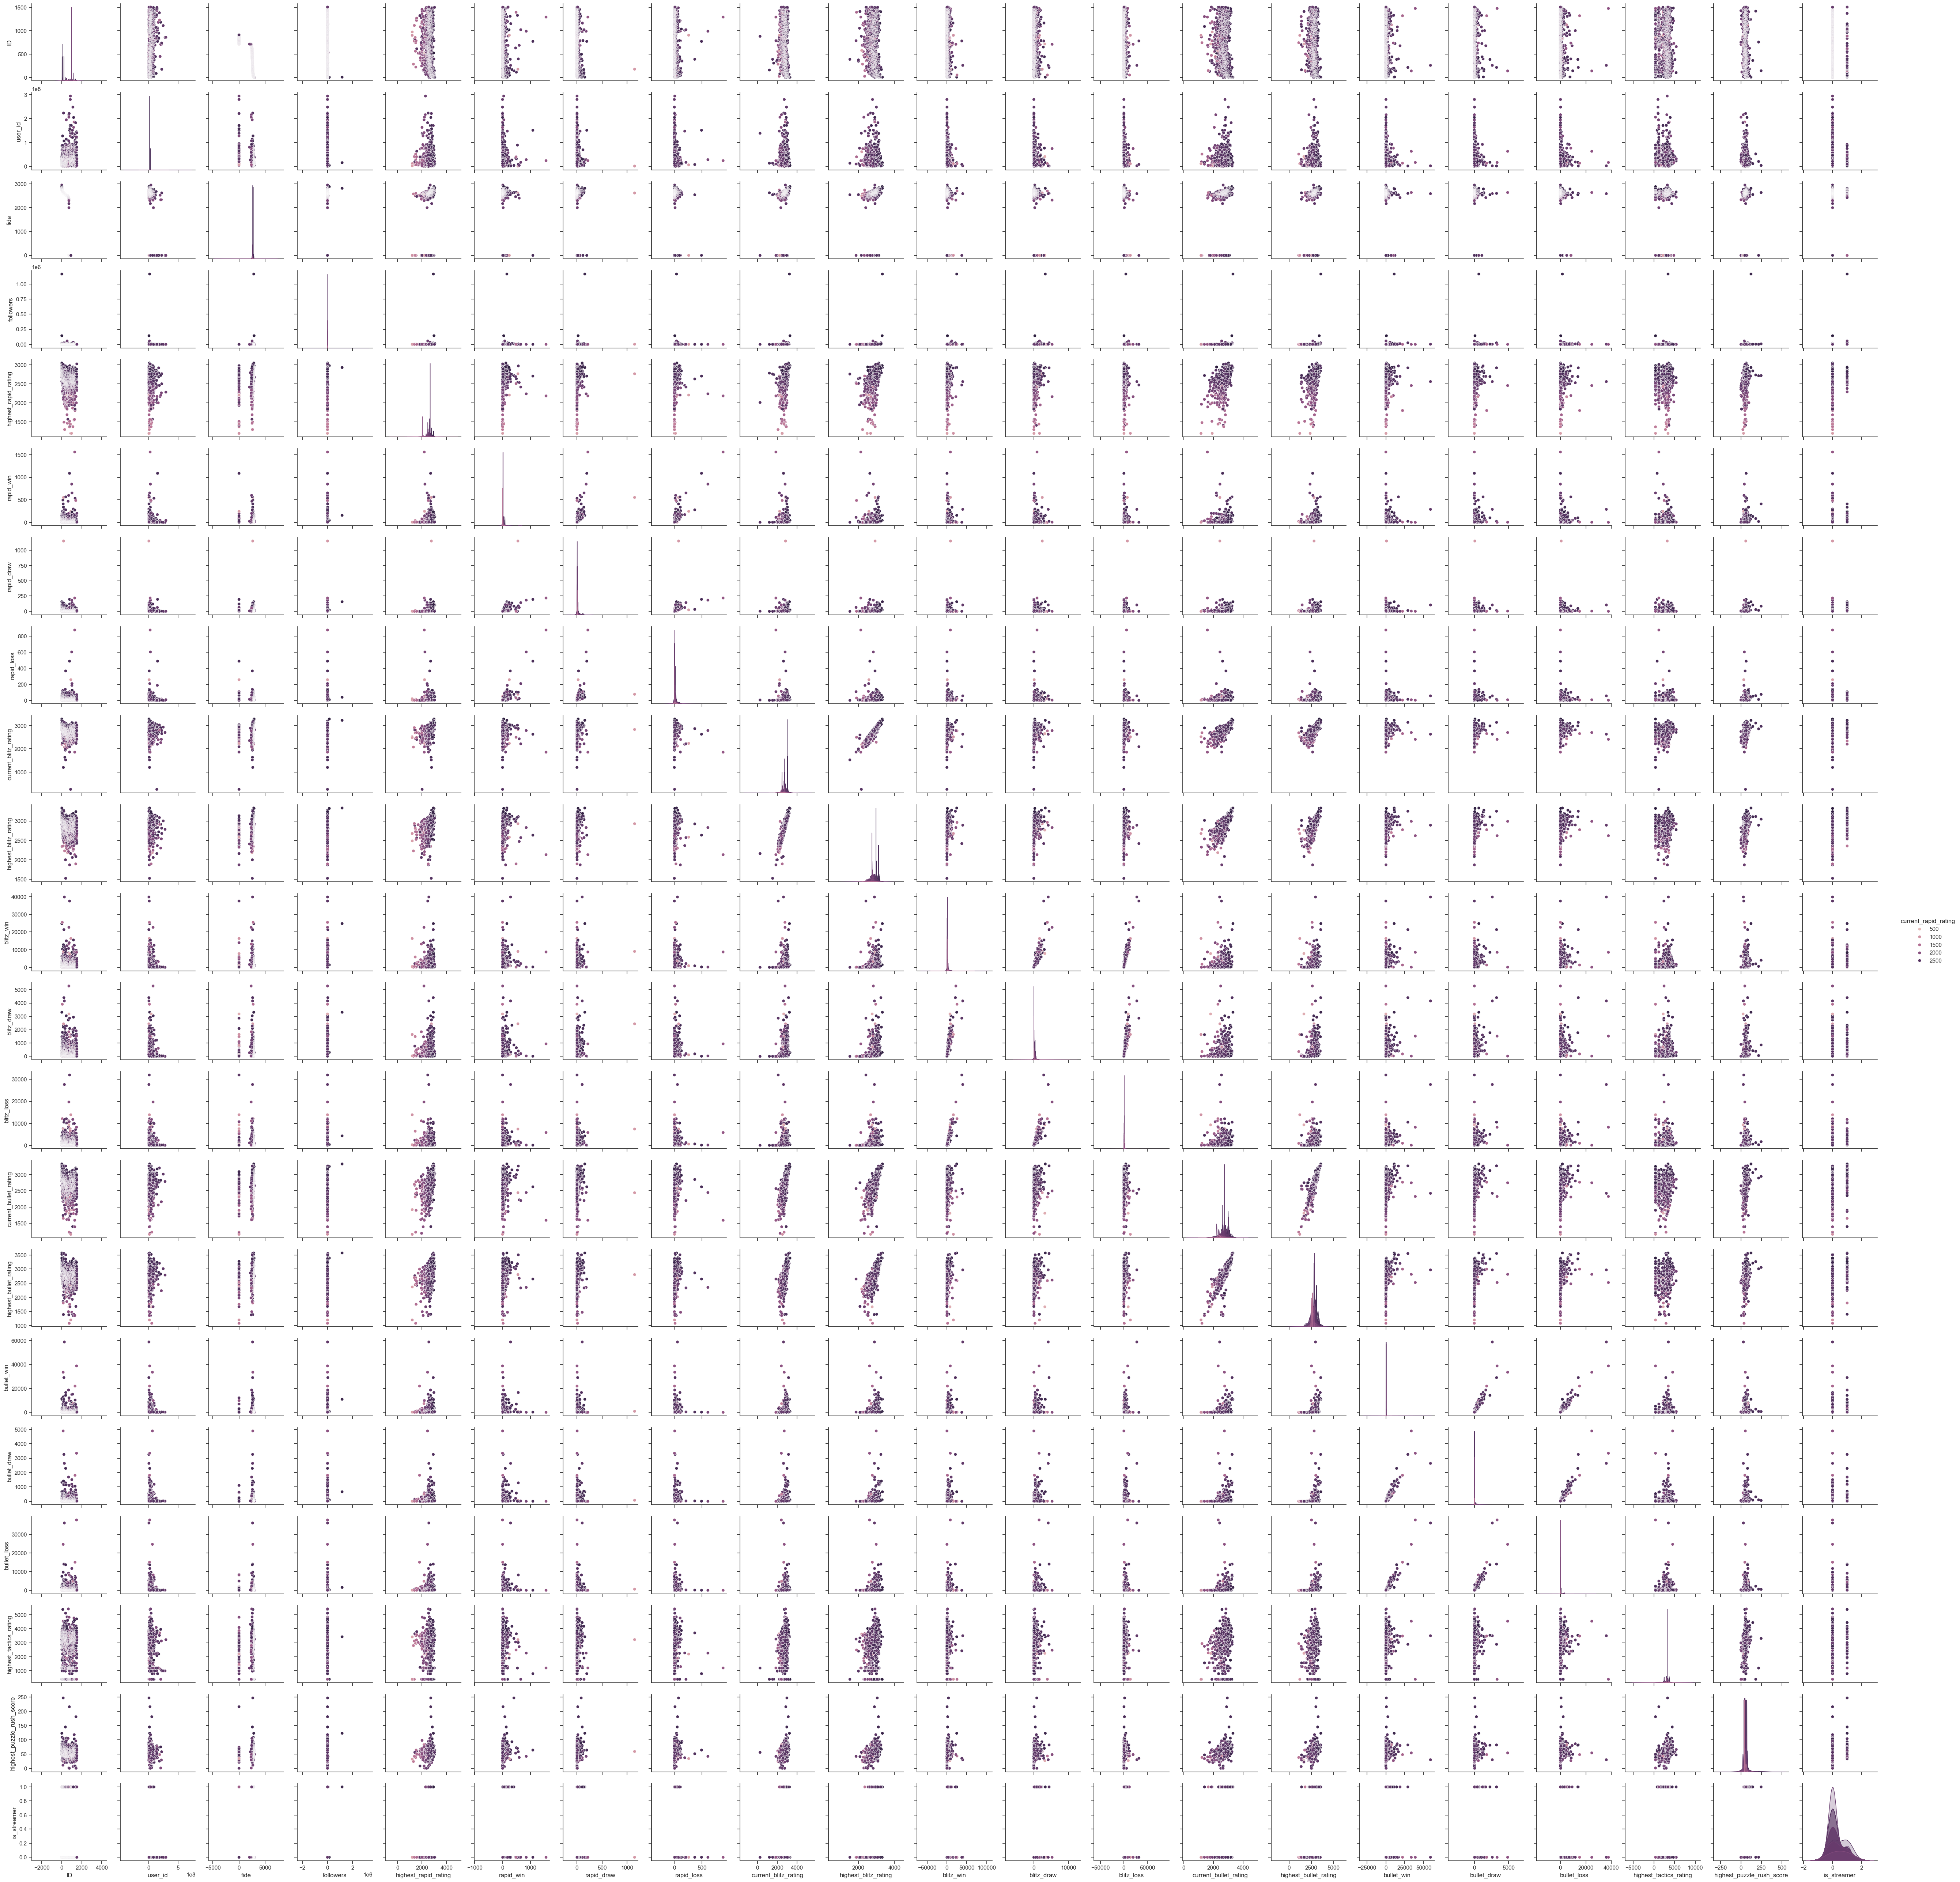

In [14]:
sns.pairplot(df, hue='current_rapid_rating')

<Axes: xlabel='current_blitz_rating'>

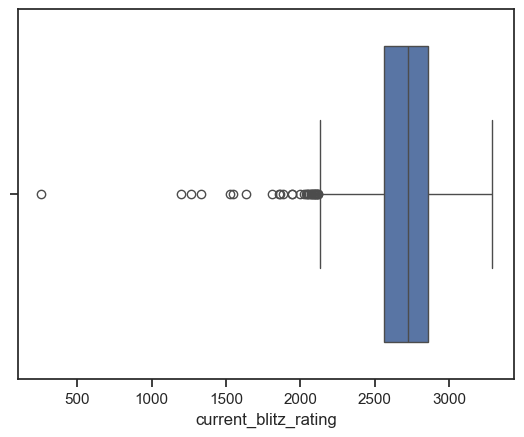

In [15]:
sns.boxplot(x=df['current_blitz_rating'])

<Axes: ylabel='current_blitz_rating'>

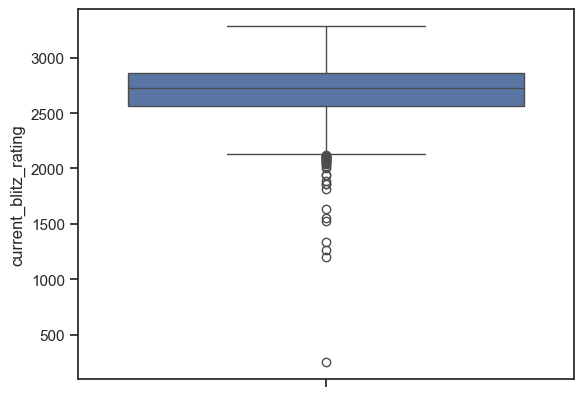

In [16]:
sns.boxplot(y=df['current_blitz_rating'])

<Axes: xlabel='status', ylabel='highest_tactics_rating'>

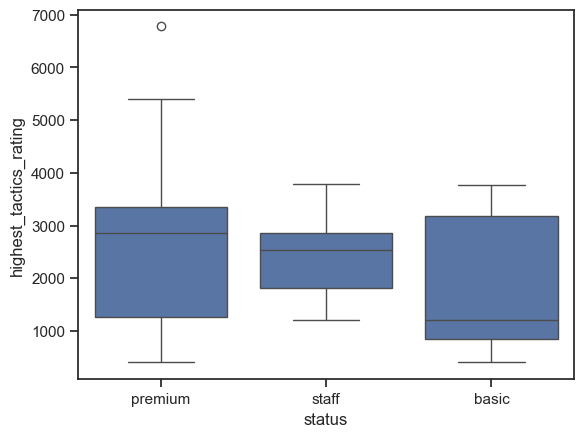

In [17]:
sns.boxplot(y=df['highest_tactics_rating'], x=df['status'], data=df)

<Axes: xlabel='current_rapid_rating'>

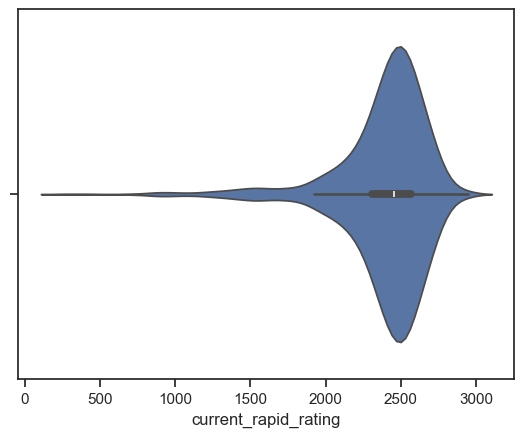

In [18]:
sns.violinplot(x=df['current_rapid_rating'])

C:\Users\Konstantin\AppData\Local\Temp\ipykernel_9876\3006505357.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['current_rapid_rating'], ax=ax[1])


<Axes: xlabel='current_rapid_rating', ylabel='Density'>

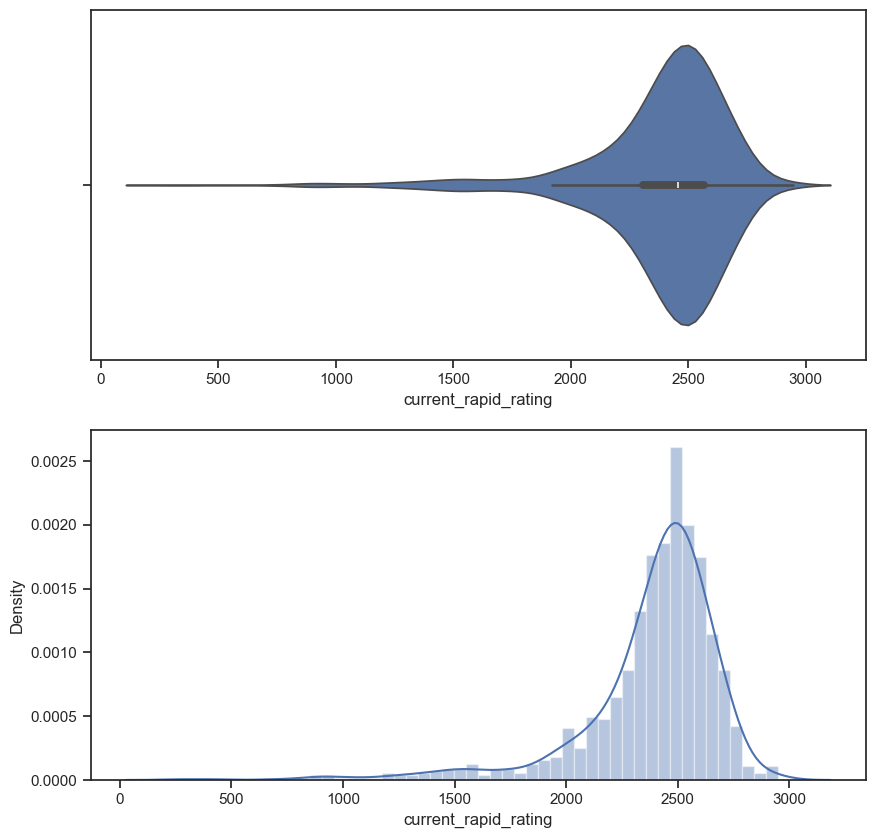

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
sns.violinplot(ax=ax[0], x = df['current_rapid_rating'])
sns.distplot(df['current_rapid_rating'], ax=ax[1])

<Axes: xlabel='status', ylabel='current_bullet_rating'>

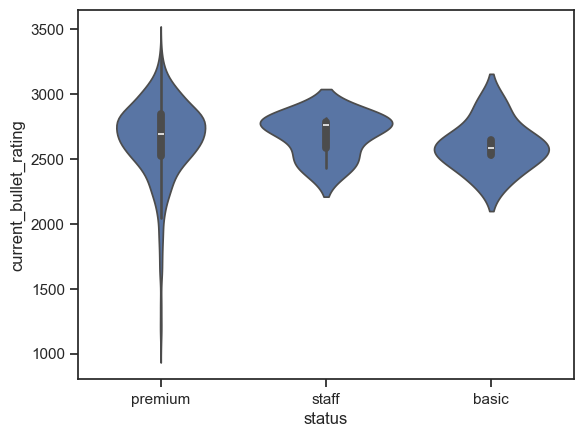

In [20]:
sns.violinplot(x='status', y='current_bullet_rating', data=df)

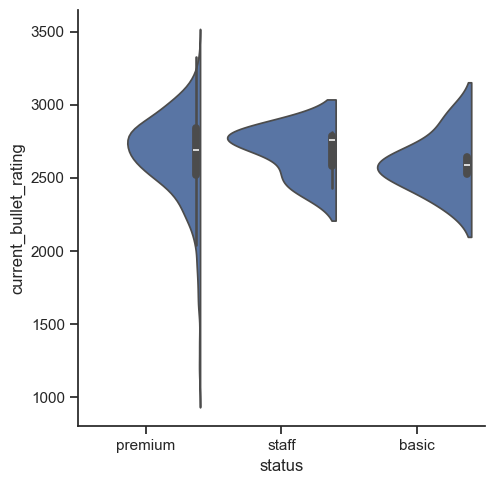

In [21]:
sns.catplot(x='status', y='current_bullet_rating', data=df, kind="violin", split=True)

# Информация о корреляции признаков

In [22]:
df.corr()

ValueError: could not convert string to float: 'Komodo Engine'

In [ ]:
df.corr(method='pearson')

/tmp/ipykernel_2722/1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


Unnamed: 0   user_id      fide  followers  \
Unnamed: 0                   1.000000  0.256594 -0.765737  -0.059366   
user_id                      0.256594  1.000000 -0.362995  -0.026902   
fide                        -0.765737 -0.362995  1.000000   0.037588   
followers                   -0.059366 -0.026902  0.037588   1.000000   
current_rapid_rating        -0.080671  0.035993  0.180581   0.055075   
highest_rapid_rating        -0.143274 -0.005121  0.204369   0.065550   
rapid_win                   -0.039322 -0.049470  0.050234   0.053055   
rapid_draw                  -0.106798 -0.068056  0.063065   0.115799   
rapid_loss                  -0.019620 -0.034813  0.015180   0.023489   
current_blitz_rating        -0.092136  0.061125  0.165392   0.080670   
highest_blitz_rating        -0.115051  0.055514  0.198789   0.087399   
blitz_win                   -0.090646 -0.160062  0.061958   0.251040   
blitz_draw                  -0.103822 -0.147386  0.105079   0.199453   
blitz_loss                  -0.053396 -0.141533  0.025616   0.060713   
current_bullet_rating       -0.079924  0.092402  0.213045   0.085508   
highest_bullet_rating       -0.094716  0.088931  0.230735   0.099468   
bullet_win                  -0.043078 -0.099524  0.075530   0.113223   
bullet_draw                 -0.057880 -0.088910  0.094102   0.077879   
bullet_loss                 -0.024927 -0.085448  0.075583   0.025611   
highest_tactics_rating      -0.073543 -0.144502  0.231809   0.023571   
highest_puzzle_rush_score   -0.100485 -0.031384  0.132257   0.121930   
is_streamer                 -0.142278 -0.089561  0.097107   0.148991   

                           current_rapid_rating  highest_rapid_rating  \
Unnamed: 0                            -0.080671             -0.143274   
user_id                                0.035993             -0.005121   
fide                                   0.180581              0.204369   
followers                              0.055075              0.065550   
current_rapid_rating                   1.000000              0.723898   
highest_rapid_rating                   0.723898              1.000000   
rapid_win                              0.035724              0.088165   
rapid_draw                            -0.003909              0.155045   
rapid_loss                             0.017743              0.059159   
current_blitz_rating                   0.368401              0.404777   
highest_blitz_rating                   0.399539              0.446255   
blitz_win                             -0.011685              0.038395   
blitz_draw                             0.013067              0.090757   
blitz_loss                            -0.062721             -0.022641   
current_bullet_rating                  0.455142              0.467820   
highest_bullet_rating                  0.401795              0.430132   
bullet_win                             0.014550              0.055847   
bullet_draw                            0.038846              0.077240   
bullet_loss                           -0.005613              0.037688   
highest_tactics_rating                 0.064143              0.048751   
highest_puzzle_rush_score              0.237110              0.235783   
is_streamer                            0.086773              0.133396   

                           rapid_win  rapid_draw  rapid_loss  \
Unnamed: 0                 -0.039322   -0.106798   -0.019620   
user_id                    -0.049470   -0.068056   -0.034813   
fide                        0.050234    0.063065    0.015180   
followers                   0.053055    0.115799    0.023489   
current_rapid_rating        0.035724   -0.003909    0.017743   
highest_rapid_rating        0.088165    0.155045    0.059159   
rapid_win                   1.000000    0.535225    0.835731   
rapid_draw                  0.535225    1.000000    0.419656   
rapid_loss                  0.835731    0.419656    1.000000   
current_blitz_rating        0.044541    0.137659  

In [ ]:
df.corr(method='kendall')

/tmp/ipykernel_2722/1723791258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='kendall')


Unnamed: 0   user_id      fide  followers  \
Unnamed: 0                   1.000000  0.196642 -0.974565  -0.159091   
user_id                      0.196642  1.000000 -0.234321  -0.178696   
fide                        -0.974565 -0.234321  1.000000   0.299631   
followers                   -0.159091 -0.178696  0.299631   1.000000   
current_rapid_rating        -0.110549 -0.001568  0.291211   0.208799   
highest_rapid_rating        -0.141337 -0.011103  0.334131   0.261680   
rapid_win                   -0.088543 -0.084175  0.149214   0.318659   
rapid_draw                  -0.078858 -0.030973  0.173308   0.281015   
rapid_loss                  -0.059227 -0.048247  0.127707   0.257666   
current_blitz_rating        -0.077563  0.060957  0.282515   0.334435   
highest_blitz_rating        -0.079158  0.049149  0.305801   0.372302   
blitz_win                   -0.070116 -0.161093  0.131264   0.422861   
blitz_draw                  -0.079735 -0.134973  0.155408   0.432848   
blitz_loss                  -0.049292 -0.139303  0.104725   0.385754   
current_bullet_rating       -0.060215  0.056250  0.268790   0.268960   
highest_bullet_rating       -0.063921  0.048970  0.285847   0.329973   
bullet_win                  -0.038412 -0.147213  0.116215   0.317801   
bullet_draw                 -0.057002 -0.124002  0.152378   0.347671   
bullet_loss                 -0.042592 -0.135275  0.122007   0.317635   
highest_tactics_rating      -0.055785 -0.062666  0.132477   0.301177   
highest_puzzle_rush_score   -0.068083 -0.010966  0.172380   0.245125   
is_streamer                 -0.116208 -0.092247  0.132310   0.238755   

                           current_rapid_rating  highest_rapid_rating  \
Unnamed: 0                            -0.110549             -0.141337   
user_id                               -0.001568             -0.011103   
fide                                   0.291211              0.334131   
followers                              0.208799              0.261680   
current_rapid_rating                   1.000000              0.557522   
highest_rapid_rating                   0.557522              1.000000   
rapid_win                              0.192066              0.215967   
rapid_draw                             0.249659              0.298586   
rapid_loss                             0.111718              0.206680   
current_blitz_rating                   0.361778              0.374032   
highest_blitz_rating                   0.361404              0.388627   
blitz_win                              0.079420              0.083890   
blitz_draw                             0.107041              0.111474   
blitz_loss                             0.050206              0.054190   
current_bullet_rating                  0.352090              0.343101   
highest_bullet_rating                  0.332435              0.339935   
bullet_win                             0.117566              0.110603   
bullet_draw                            0.146982              0.144514   
bullet_loss                            0.111078              0.108062   
highest_tactics_rating                 0.070826              0.068397   
highest_puzzle_rush_score              0.210427              0.197392   
is_streamer                            0.094446              0.123543   

                           rapid_win  rapid_draw  rapid_loss  \
Unnamed: 0                 -0.088543   -0.078858   -0.059227   
user_id                    -0.084175   -0.030973   -0.048247   
fide                        0.149214    0.173308    0.127707   
followers                   0.318659    0.281015    0.257666   
current_rapid_rating        0.192066    0.249659    0.111718   
highest_rapid_rating        0.215967    0.298586    0.206680   
rapid_win                   1.000000    0.607881    0.622912   
rapid_draw                  0.607881    1.000000    0.644006   
rapid_loss                  0.622912    0.644006    1.000000   
current_blitz_rating        0.227934    0.273150  

In [ ]:
df.corr(method='spearman')

/tmp/ipykernel_2722/1222267885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


Unnamed: 0   user_id      fide  followers  \
Unnamed: 0                   1.000000  0.292181 -0.994790  -0.231501   
user_id                      0.292181  1.000000 -0.339908  -0.254814   
fide                        -0.994790 -0.339908  1.000000   0.417637   
followers                   -0.231501 -0.254814  0.417637   1.000000   
current_rapid_rating        -0.155468 -0.001214  0.404016   0.303573   
highest_rapid_rating        -0.204717 -0.014838  0.467275   0.380414   
rapid_win                   -0.130322 -0.119421  0.215013   0.450000   
rapid_draw                  -0.115400 -0.042121  0.244873   0.393815   
rapid_loss                  -0.088250 -0.067009  0.184196   0.363118   
current_blitz_rating        -0.105831  0.091345  0.392582   0.476802   
highest_blitz_rating        -0.109071  0.073890  0.426571   0.522692   
blitz_win                   -0.105492 -0.234554  0.191017   0.592418   
blitz_draw                  -0.118453 -0.195744  0.224569   0.604549   
blitz_loss                  -0.074561 -0.202869  0.153678   0.547056   
current_bullet_rating       -0.082043  0.083710  0.376109   0.390238   
highest_bullet_rating       -0.089468  0.073008  0.402101   0.471350   
bullet_win                  -0.056428 -0.220849  0.168849   0.461749   
bullet_draw                 -0.083357 -0.184033  0.219845   0.497864   
bullet_loss                 -0.064013 -0.202839  0.180188   0.460730   
highest_tactics_rating      -0.077507 -0.083872  0.183325   0.432457   
highest_puzzle_rush_score   -0.100642 -0.016209  0.248999   0.354252   
is_streamer                 -0.142278 -0.112942  0.158664   0.291609   

                           current_rapid_rating  highest_rapid_rating  \
Unnamed: 0                            -0.155468             -0.204717   
user_id                               -0.001214             -0.014838   
fide                                   0.404016              0.467275   
followers                              0.303573              0.380414   
current_rapid_rating                   1.000000              0.740160   
highest_rapid_rating                   0.740160              1.000000   
rapid_win                              0.272816              0.312635   
rapid_draw                             0.339603              0.418596   
rapid_loss                             0.153116              0.297279   
current_blitz_rating                   0.511213              0.530588   
highest_blitz_rating                   0.512229              0.552304   
blitz_win                              0.116314              0.124449   
blitz_draw                             0.156582              0.164666   
blitz_loss                             0.074004              0.080190   
current_bullet_rating                  0.497788              0.493845   
highest_bullet_rating                  0.473330              0.489857   
bullet_win                             0.172898              0.162653   
bullet_draw                            0.214771              0.210564   
bullet_loss                            0.163575              0.159106   
highest_tactics_rating                 0.103611              0.101751   
highest_puzzle_rush_score              0.310068              0.290691   
is_streamer                            0.115526              0.151107   

                           rapid_win  rapid_draw  rapid_loss  \
Unnamed: 0                 -0.130322   -0.115400   -0.088250   
user_id                    -0.119421   -0.042121   -0.067009   
fide                        0.215013    0.244873    0.184196   
followers                   0.450000    0.393815    0.363118   
current_rapid_rating        0.272816    0.339603    0.153116   
highest_rapid_rating        0.312635    0.418596    0.297279   
rapid_win                   1.000000    0.770275    0.789144   
rapid_draw                  0.770275    1.000000    0.804636   
rapid_loss                  0.789144    0.804636    1.000000   
current_blitz_rating        0.322577    0.379116  

/tmp/ipykernel_2722/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

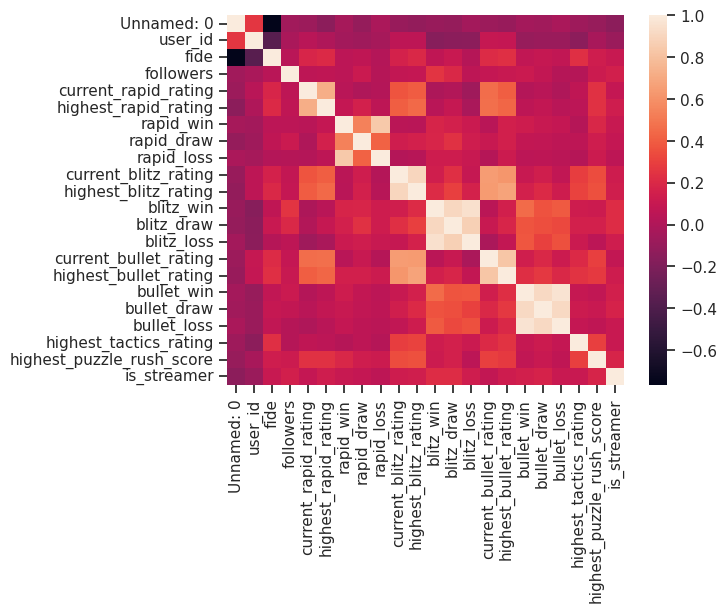

In [ ]:
sns.heatmap(df.corr())

/tmp/ipykernel_2722/2350136881.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.1f')


<Axes: >

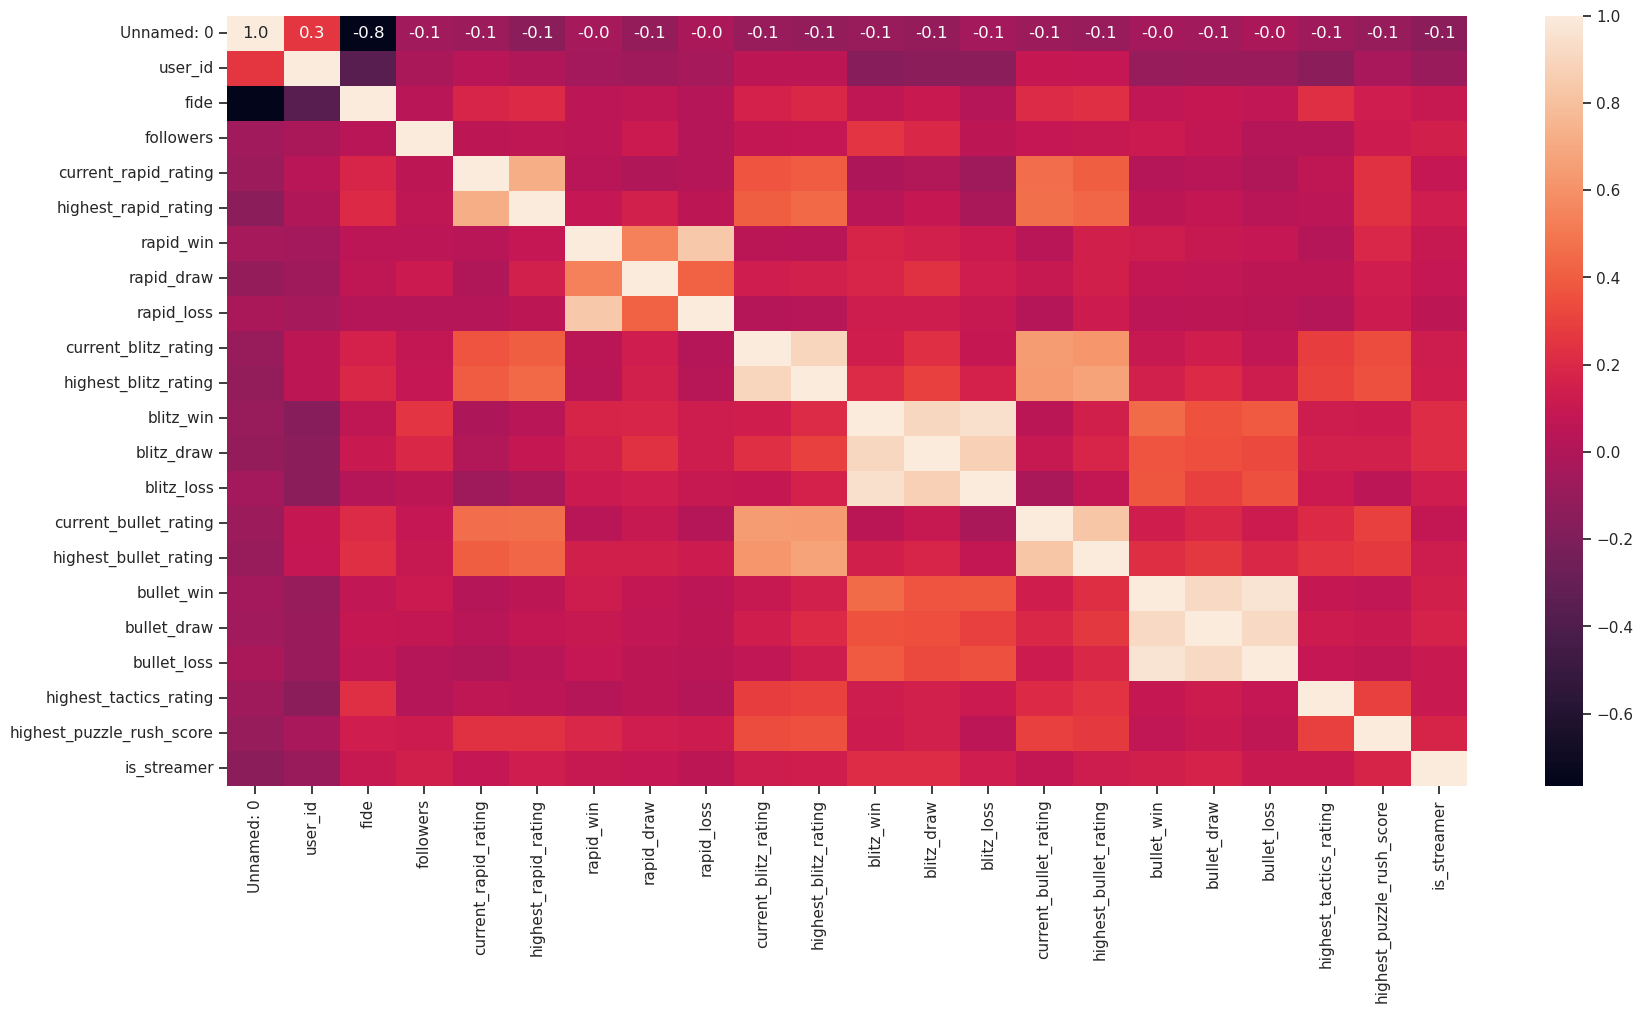

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True, fmt='.1f')

/tmp/ipykernel_2722/576802447.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.1f')


<Axes: >

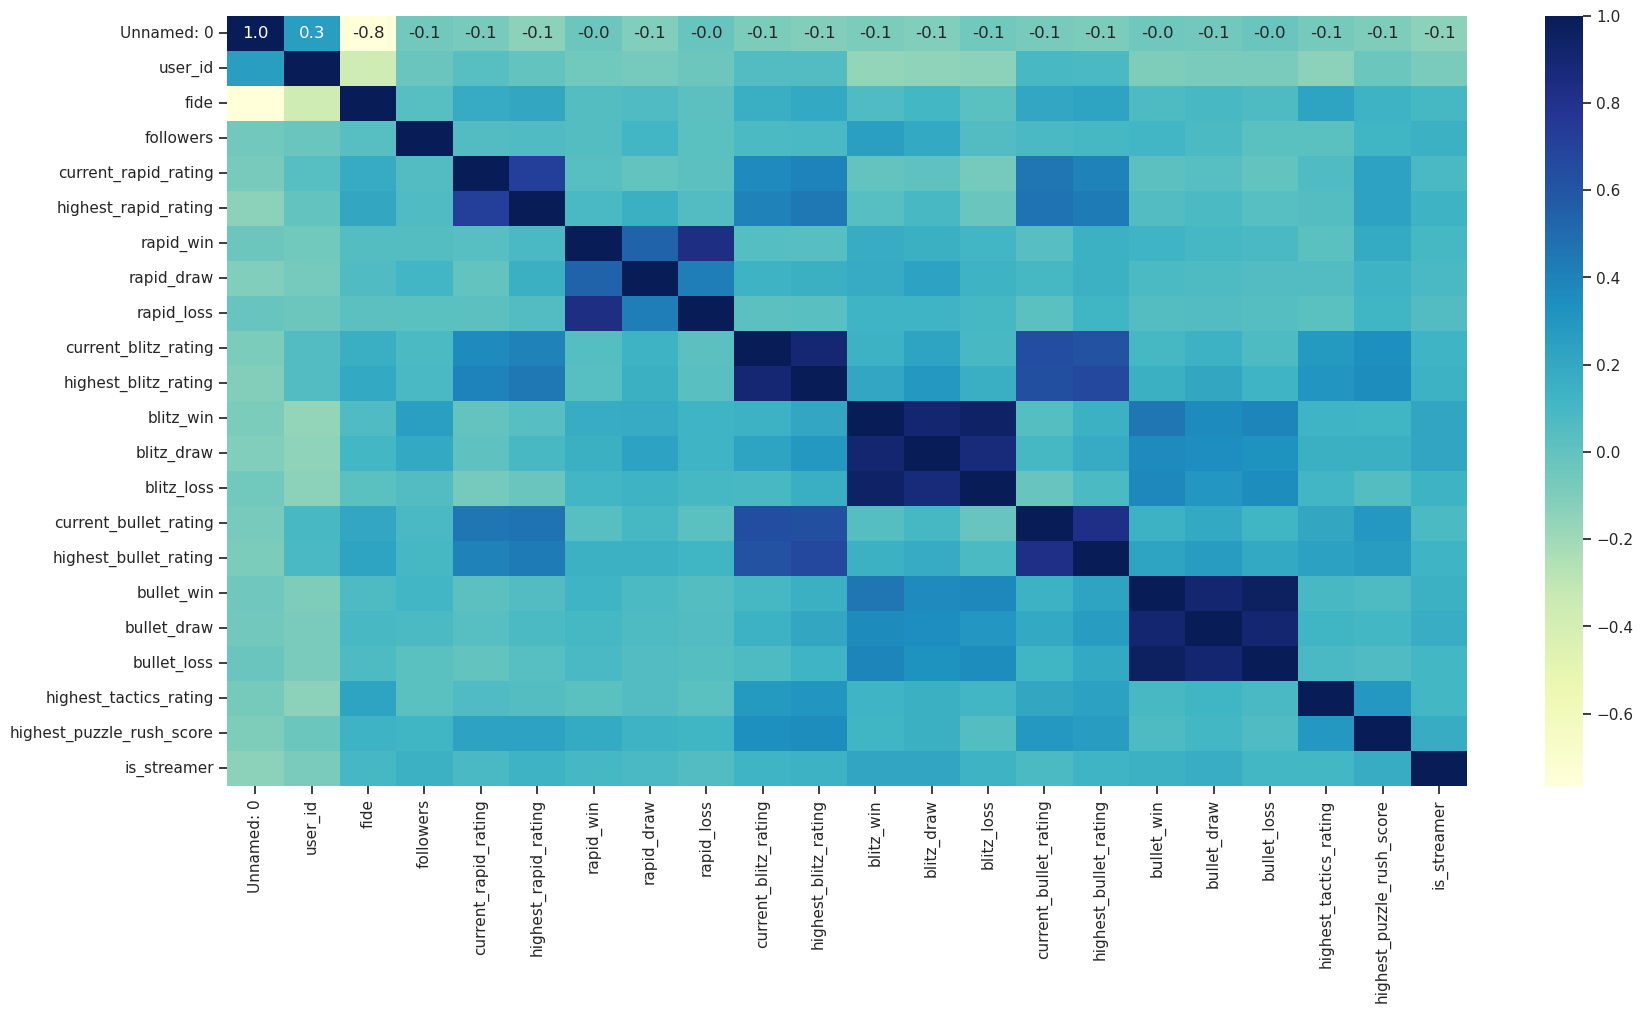

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.1f')

/tmp/ipykernel_2722/972567915.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr(), dtype=bool)
/tmp/ipykernel_2722/972567915.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.1f')
/usr/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

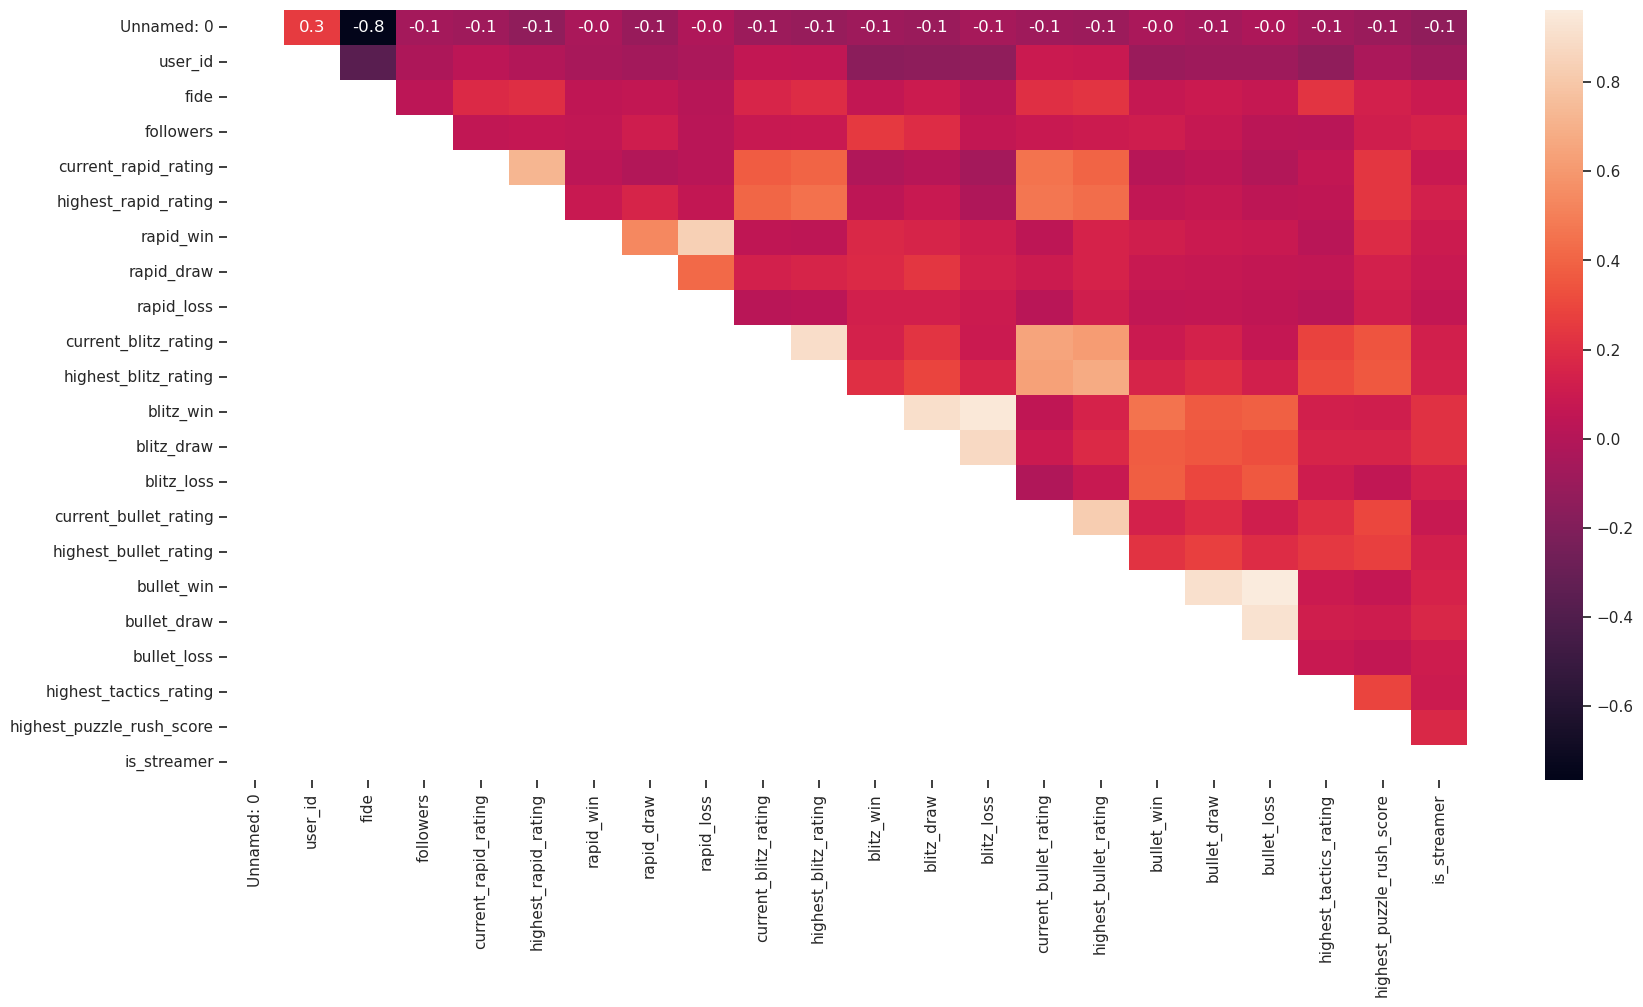

In [ ]:
plt.figure(figsize = (20,10))
mask = np.zeros_like(df.corr(), dtype=bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.1f')

/tmp/ipykernel_2722/3059761856.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), ax=ax[0][0], annot=True, fmt='.1f')
/tmp/ipykernel_2722/3059761856.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='kendall'), ax=ax[0][1], annot=True, fmt='.1f')
/tmp/ipykernel_2722/3059761856.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='spearman'), ax=ax[1][0], annot=True, fmt='.1f')


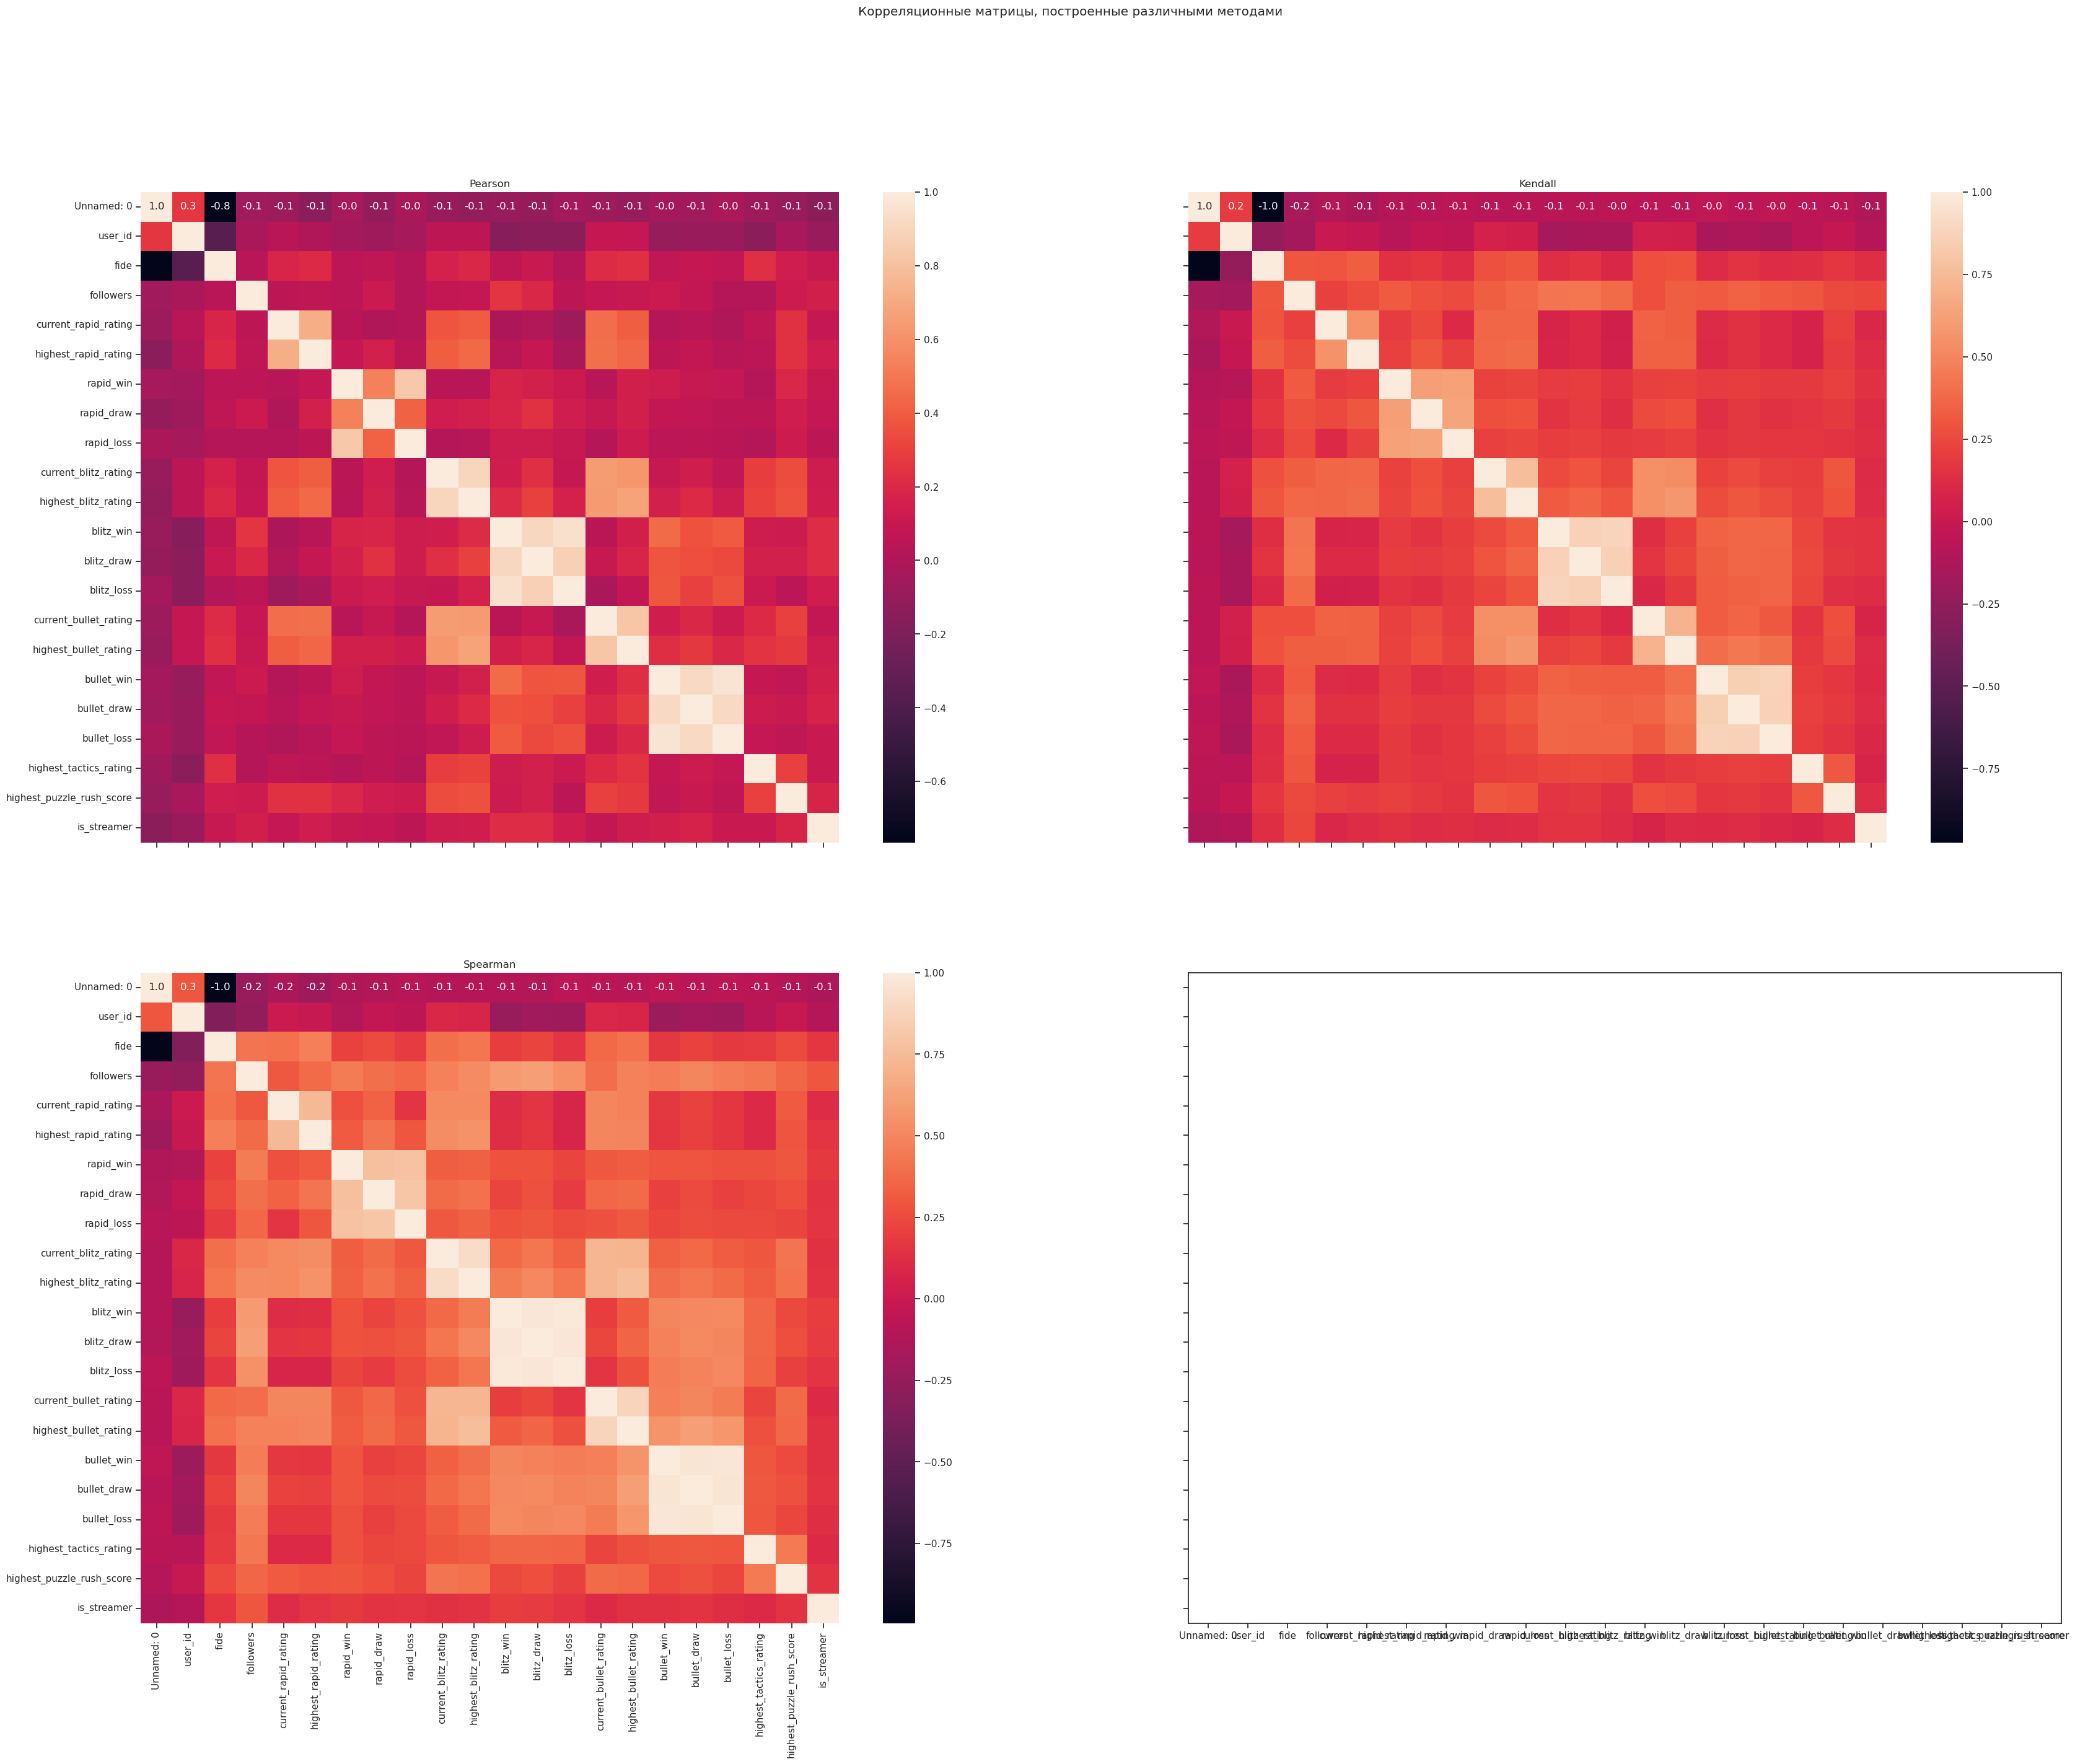

In [ ]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(40,30))
sns.heatmap(df.corr(method='pearson'), ax=ax[0][0], annot=True, fmt='.1f')
sns.heatmap(df.corr(method='kendall'), ax=ax[0][1], annot=True, fmt='.1f')
sns.heatmap(df.corr(method='spearman'), ax=ax[1][0], annot=True, fmt='.1f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0][0].title.set_text('Pearson')
ax[0][1].title.set_text('Kendall')
ax[1][0].title.set_text('Spearman')

/tmp/ipykernel_2722/1157436562.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=ax, annot=True, fmt='.1f')


<Axes: >

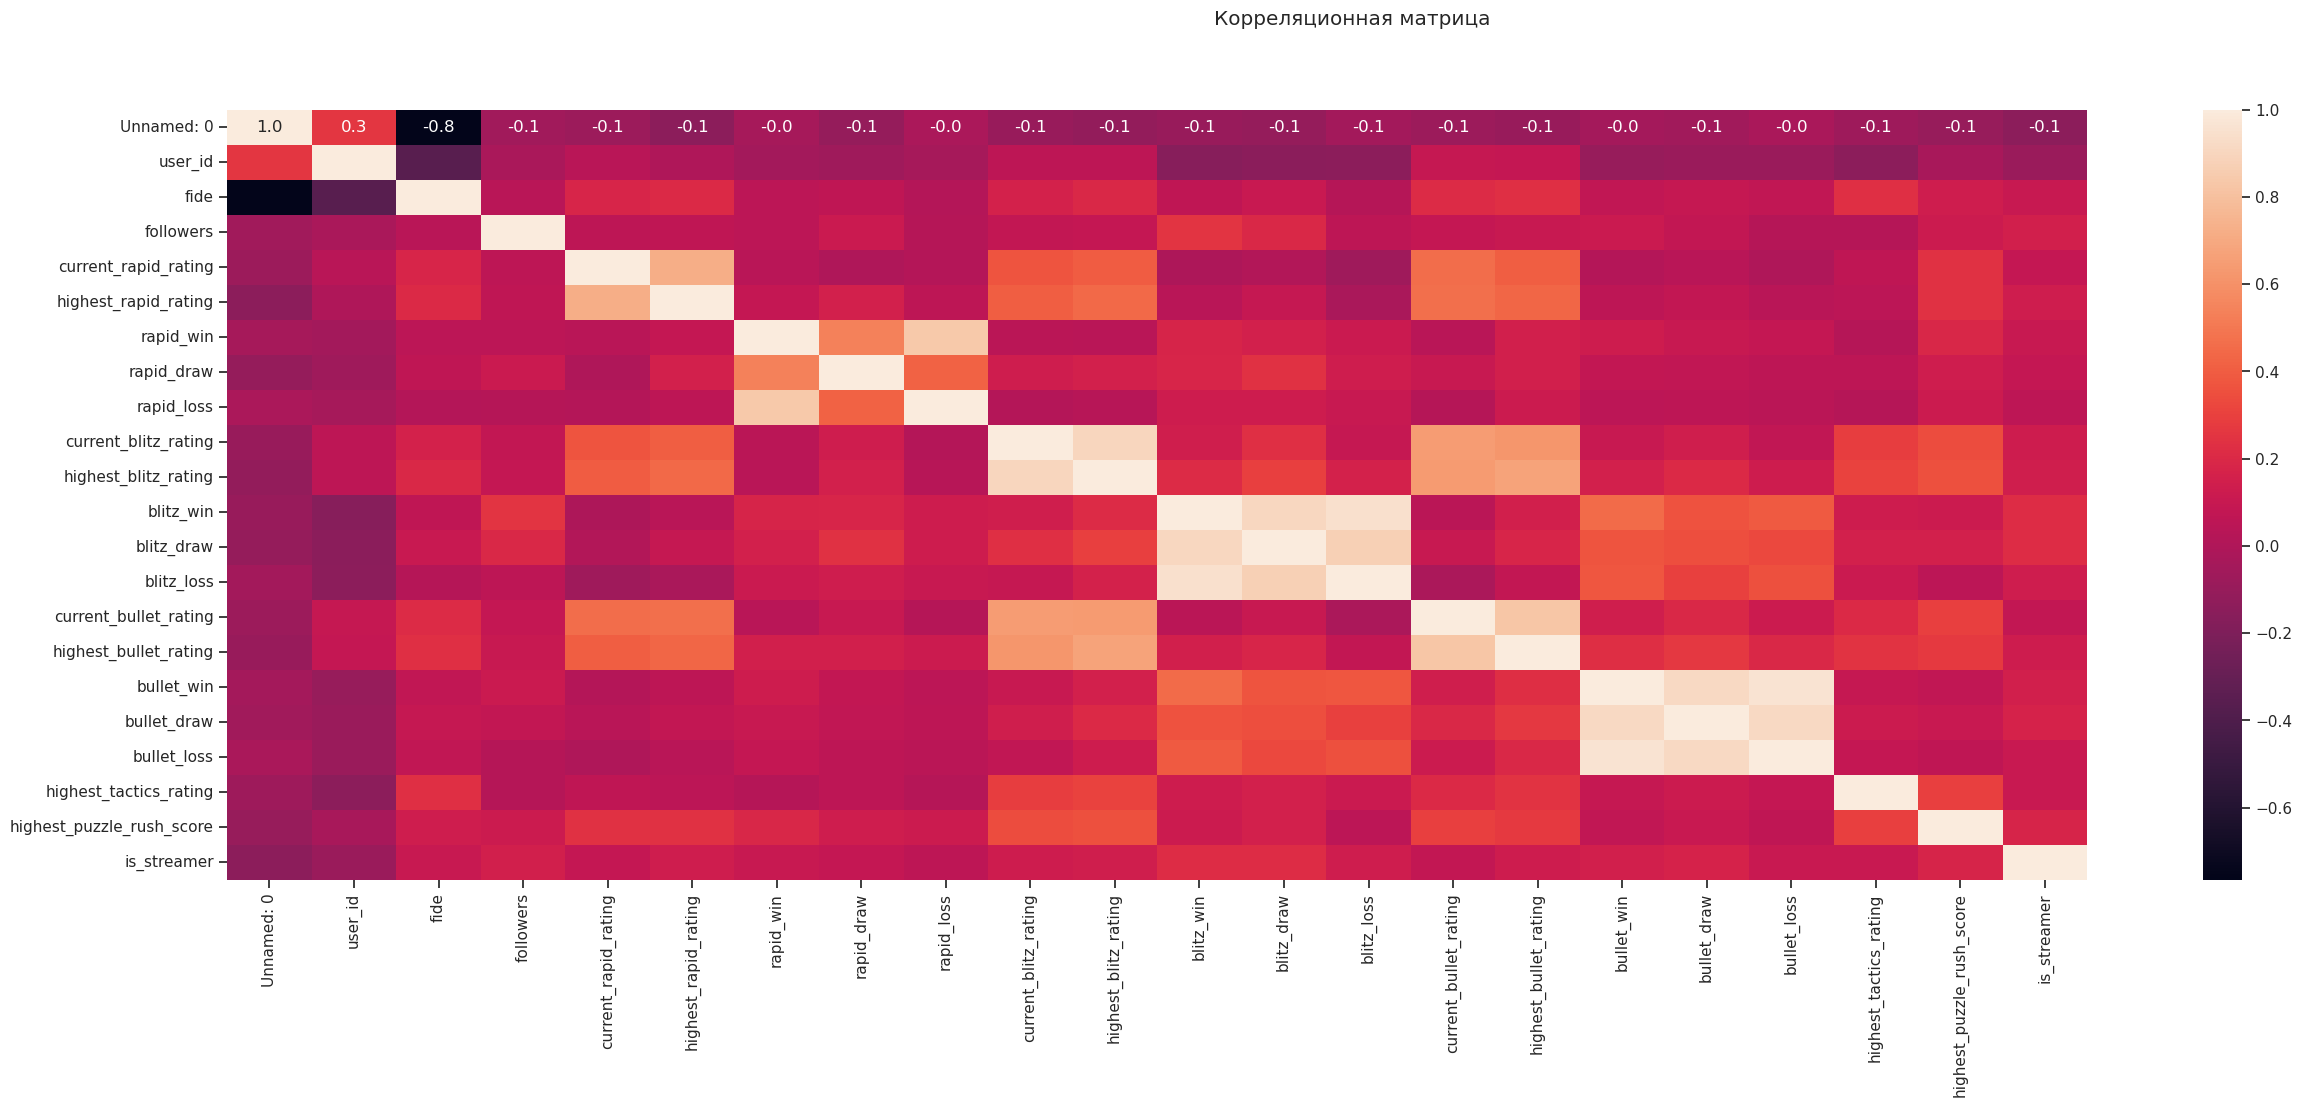

In [ ]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(30,10))
fig.suptitle('Корреляционная матрица')
sns.heatmap(df.corr(), ax=ax, annot=True, fmt='.1f')